In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [20]:
# Simple 1-D Kalman Filter based on the code available at:
# https://github.com/denyssene/SimpleKalmanFilter
class SimpleKalmanFilter:
    def __init__(self, err_measure, err_est, p_noise):
        self.err_measure = err_measure
        self.err_estimate = err_est
        self.q = p_noise
        self.current_estimate = 0
        self.last_estimate = 0
        self.kalman_gain = 0
        
    def updateEstimate(self, measure):
        self.kalman_gain = self.err_estimate / (self.err_estimate + self.err_measure)
        self.current_estimate = self.last_estimate + self.kalman_gain * (measure - self.last_estimate)
        self.err_estimate = (1.0 - self.kalman_gain) * self.err_estimate + abs(self.last_estimate - self.current_estimate) * self.q
        self.last_estimate = self.current_estimate
        return self.current_estimate

    def setMeasurementError(self, err_measure):
        self.err_measure = err_measure
        
    def setEstimateError(self, err_est):
        self.err_estimate = err_est
        
    def setProcessNoise(self, p_noise):
        self.q = p_noise

    def getKalmanGain(self):
        return self.kalman_gain
    
    def getEstimateError(self):
        return self.err_estimate

In [41]:
# Intialize filter
kfilter = SimpleKalmanFilter(1, 1, 0.03)

In [42]:
# Generate noisy measurement data
x = np.linspace(0, 10, 1000)
measurements = np.sin(x) + np.random.normal(0, 0.5, 1000)

In [43]:
# Generate estimates
estimates = []
for m in measurements:    
    e = kfilter.updateEstimate(m)
    estimates += [e]

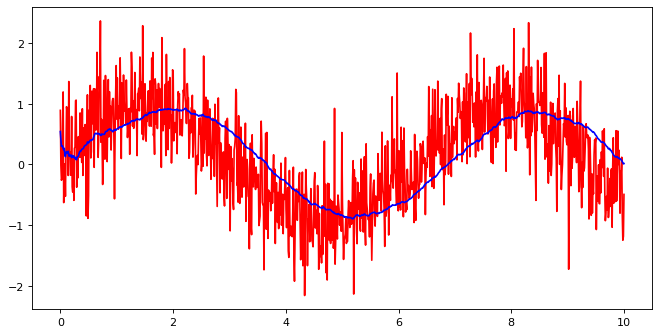

In [44]:
# Plot measurement and estimates
figure(figsize=(10, 5), dpi=80)
plt.plot(x, values, color='red')
plt.plot(x, estimates, color='blue')